<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>
CS412: Data Science - Final Project <br><br>
Predicting Survival in Maritime Accidents using Machine Learning - A Case Study of the Titanic
</h1>

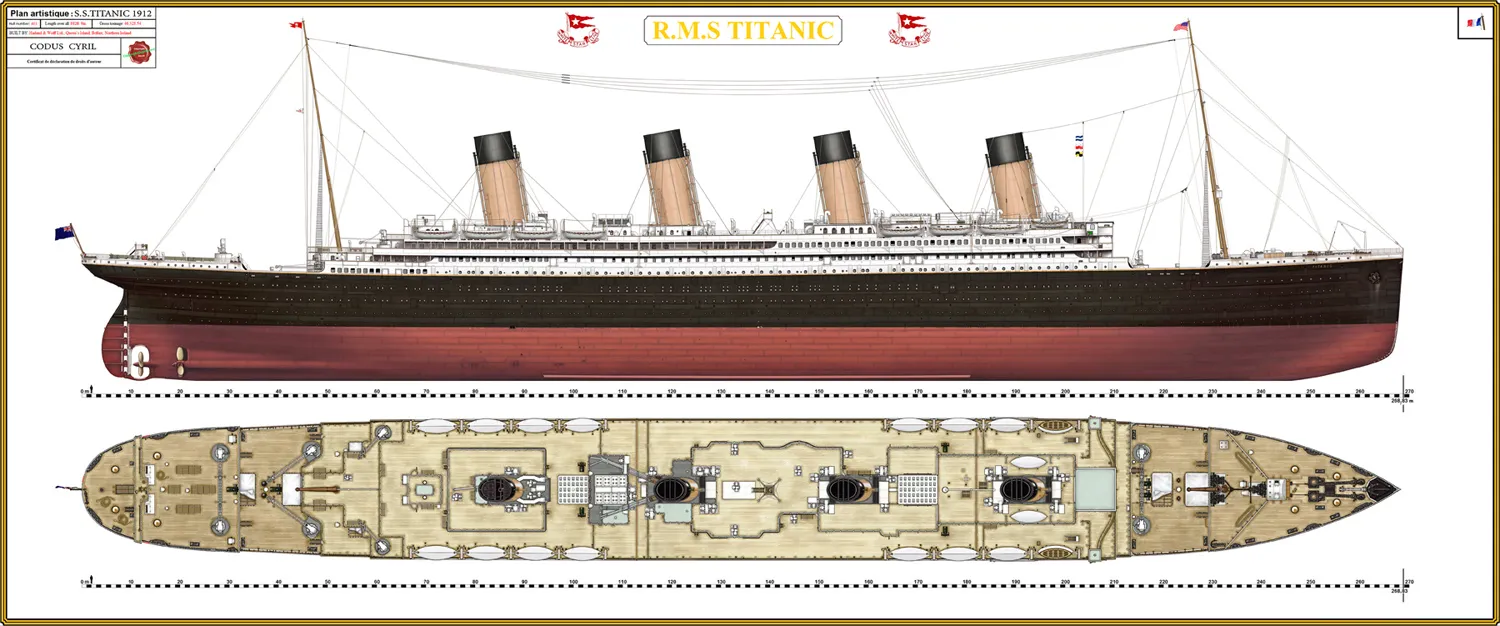

<br>
<p><center>
Zainab Shafeeq Al Khulaif (219036327)
<br>
<br>
    </p>

<p><center>
<strong>Supervised by:</strong>
<br>
Nora Bander Alshuaibi
</p>

# Part 1: Project Overview

<p align="justify">
The maritime industry is a crucial part of many countries' economies. It plays an important role to both the employment rate, as well as the country's revenue. However, the significance of the maritime industry <strong>does not</strong> overshadow the fact that it is a dangerous industry. Every year, all kinds of maritime accidents occur, resulting in fatalities and/or serious injuries.
</p>

### Problem Statement

<p align="justify">
Maritime accidents can be <em>devastating</em>, causing loss of lives, damage to properties, and environmental harm. It is, therefore, important to identify the factors influencing the survival rates in such accidents, in order to <em>minimize</em> the collateral damages. By understanding these factors, we can improve the preventive measures, the design and operation of ships, and the effectiveness of the emergency response plans.
</p>

### Objectives

1.   Identify the most important factors that influenced survival on the Titanic.
2.   Develop a model to predict survival in future maritime accidents.
3.   Contribute to the field of data science by developing and applying new data science techniques to the Titanic dataset.

### Dataset

<p align="justify">
The ”Titanic: Machine Learning from Disaster” dataset is a valuable resource for studying maritime accidents and predicting the factors influencing survival rates. This dataset is available at <strong><a href="https://www.kaggle.com/">Kaggle</a></strong> and contains information on over 1,300 passengers who were on board the Titanic when it sank in 1912, including their age, gender, class, and whether they survived or not.
</p>

# Part 2: Dataset Selection and Description

### Dataset Overview

<p align="justify">
The "<strong>Titanic - Machine Learning from Disaster</strong>" dataset is a widely used dataset for machine learning tasks, particularly in the context of predictive modeling. It consists of data on passengers who were aboard the Titanic in 1912. The dataset contains information about each passenger's age, gender, social class, ticket fare, and whether or not they survived the disaster. This dataset has been used for various machine learning applications, such as predicting passenger survival, analyzing factors that influenced survival rates, and exploring the impact of social class on the disaster's outcome.
</p>

### Dataset Description

<p align="justify">
Below are the definitions of the Titanic dataset features:
<br>

*   **PassengerID**: A unique identifier for each passenger.
*   **Survived**: Whether or not the passenger survived the sinking of the Titanic.
*   **Pclass**: The passenger's ticket class.
*   **Name**: The passenger's name.
*   **Sex**: The passenger's gender.
*   **Age**: The passenger's age in years.
*   **SibSp**: The number of siblings and spouses aboard the Titanic.
*   **Parch**: The number of parents and children aboard the Titanic with the passenger.
*   **Ticket**: The passenger's ticket number.
*   **Fare**: The passenger's fare in British pounds sterling.
*   **Cabin**: The passenger's cabin number (if applicable).
*   **Embarked**: The port of embarkation.
</p>



# Part 3: Read and Explore Data

<p>
In this section, we will read the Titanic CSV file and perform data exploration.
</p>

#### Import required libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#### Read the CSV file

In [45]:
# Read the CSV file into a DataFrame
Titanic_df = pd.read_csv("train.csv")

#### Data Basic Exploration

* Display the first few rows of the dataset to get an overview.
* Check the number of rows and columns in the dataset.

In [46]:
# Display the first few rows of the DataFrame to inspect the data
Titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [47]:
# Check the shape of the dataset
print(f"Number of rows: {Titanic_df.shape[0]}")  # This line prints the number of rows (observations) in the dataset.
print(f"Number of columns: {Titanic_df.shape[1]}")  # This line prints the number of columns (features) in the dataset.

# Check the names of the columns
print(Titanic_df.columns)

Number of rows: 891
Number of columns: 12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Summary Statistics

<p align="justify">
Use info() method tp print out a concise summary of the dataframe, including information about the index, data types, columns, non-null values, and memory usage.
</p>

In [48]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p align="justify">
Use describe method to calculate basic statistics (mean, median, standard deviation, etc.) for numeric columns.
</p>

In [49]:
# Summary statistics
Titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Part 4: Exploratory Data Analysis

### Exploratory Data Analysis (EDA)

<p align="justify">
<strong> Exploratory Data Analysis (EDA)</strong> is an approach in data analysis that involves the <em>initial</em> exploration and visualization of a dataset to summarize its main characteristics.
</p>

### The Importance of EDA

<p align="justify">
<strong>EDA</strong> helps data analysts and data scientists to <em>understand</em> the data's structure, distribution, and potential relationships between variables. This provides an <em>insight</em> that guides further data processing and modelling decisions.
</p>

### EDA Techniques

<p align="justify">
<strong>EDA</strong> techniques may include summary statistics, data cleaning, and data visualization. In this project, we will perform data visualization to <em>identify</em> and <em>justify</em> the preprocessing techniques performed later on when <strong>cleaning</strong> the data.
</p>

# Part 5: Data Visualization

<p align="justify">
In this section, we <em>illustrate</em> the important features by <em>demonstrating</em> the different relationships between them, that are more likely to influence survival. This will subsequently <strong>enhance</strong> the performance of the machine learning model.
</p>

### A - Import Required Libraries

In [50]:
import seaborn as sn
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

### B - Age and Sex

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

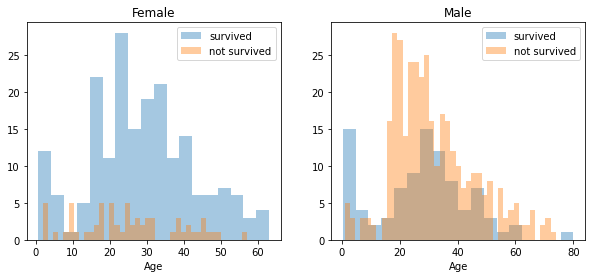

In [51]:
#Drawing the figures
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Extracting the column concerned
women = Titanic_df[Titanic_df["Sex"] == "female"]
men = Titanic_df[Titanic_df["Sex"] == "male"]

#Female figure
ax = sn.distplot(women[women["Survived"]==1].Age.dropna(), bins=18, label = "survived", ax = axes[0], kde = False)
ax = sn.distplot(women[women["Survived"]==0].Age.dropna(), bins=40, label = "not survived", ax = axes[0], kde = False)
ax.legend()
ax.set_title("Female")

#Male figure
ax = sn.distplot(men[men["Survived"]==1].Age.dropna(), bins=18, label = "survived", ax = axes[1], kde = False)
ax = sn.distplot(men[men["Survived"]==0].Age.dropna(), bins=40, label = "not survived", ax = axes[1], kde = False)
ax.legend()
ax.set_title("Male")


<p align="justify">
The figure above shows a high survival probability for men when they are between 18 and 40 years old. This is also true for women, as the survival chances raise higher when they are between 15 and 40 years old. Another observation is that <em>infants</em> have a little bit higher probability of survival.
<br>
<br>
We can conclude that both <strong>Age</strong> and <strong>Sex</strong> contribute to the survival rates, as there seem to be <strong>certain ages</strong> that have higher chances of survival.
</p>

### C - Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

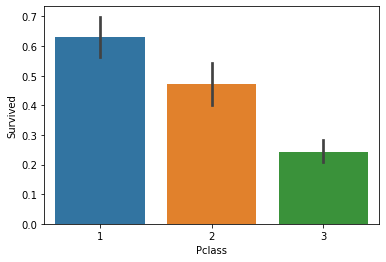

In [52]:
sn.barplot(x = "Pclass", y = "Survived", data = Titanic_df)

<p align="justify">
The figure above shows that, regardless of Sex and Age, Pclass <strong>is</strong> contributing to the survival. This is especially true if the person is in class 1. Furthermore, in order to confirm  this assumption about class 1, we will create another plot with regards to the person’s <strong>Age</strong>.
</p>

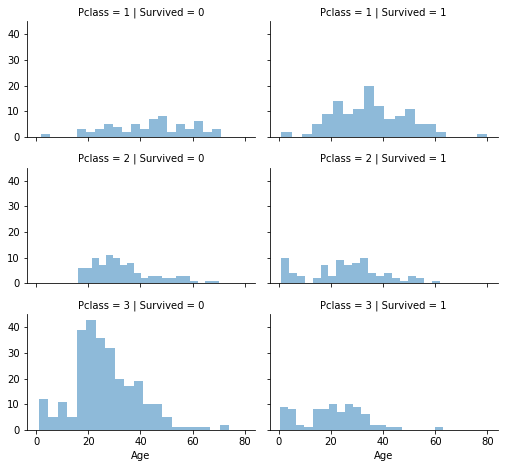

In [53]:
grid = sn.FacetGrid(Titanic_df, col = "Survived", row = "Pclass", height = 2.2, aspect = 1.6)
grid.map(plt.hist, "Age", alpha = .5, bins = 20)
grid.add_legend();

<p align="justify">
The plot in the above figure confirms our assumptions about class 1. However, we can also notice a higher probability that if a person is in class 3, he/she will not survive.
</p>

### D - Embarked, Pclass and Sex

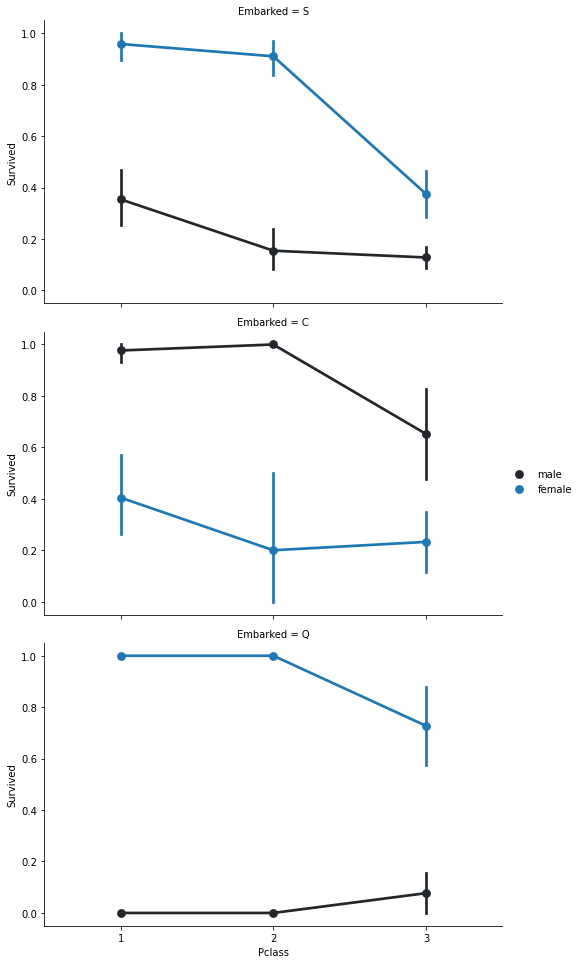

In [54]:
grid2 = sn.FacetGrid(Titanic_df, row = "Embarked", height = 4.5, aspect = 1.6)
grid2.map(sn.pointplot, "Pclass", "Survived", "Sex", palette = None,  order = None, hue_order = None )
grid2.add_legend()

<p align="justify">
As shown in the figure, Embarked seems to be correlated to survival, with a high dependency on the gender. An obvious observation is that women on ports Q and S have a higher chance of survival than women on port C. On the other hand, men seem to have a high probability of survival if they are on port C, in contrast to men on ports Q and S.
</p>

### E - SibSp and Parch

In [55]:
Titanic_df["Relatives"] = Titanic_df["SibSp"] + Titanic_df["Parch"]

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


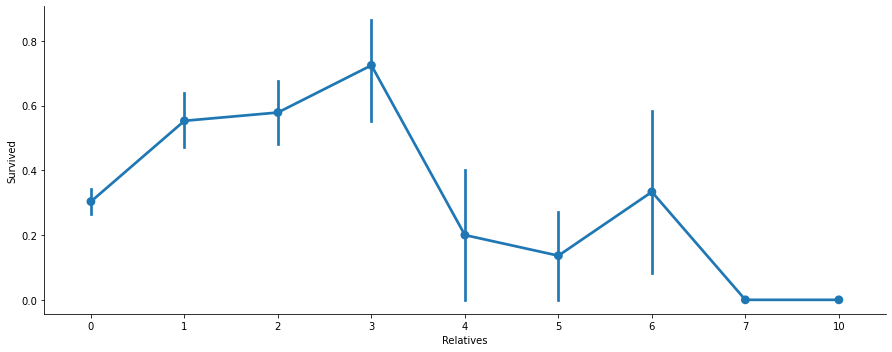

In [56]:
axes = sn.factorplot("Relatives", "Survived", data = Titanic_df, aspect = 2.5)

<p align="justify">
The relatives’ axis shown in the above figure refers to <strong>both</strong> SibSp (siblings and spouse) and Parch (parents and children). We can clearly notice that a person has a high probability of survival if he/she has 1 to 3 relatives aboard. In the contrary, a lower survival probability is encountered if a person has less than 1 or more than 3 relatives. However, we can spot an exception for some of the cases with 6 relatives.
</p>

# Part 6: Data Preprocessing

<p align="justify">
<strong>Data Preprocessing</strong> is the process of cleaning, transforming, and integrating of raw data in order to make it ready for analysis.
<br>
There is a number of data preprocessing techniques that are required to be performed on the Titanic dataset. These techniques include:


*   Identifying and removing outliers
*   Handling missing values
*   Encoding categorical features, and
*   Scaling numerical features.

</p>

The following table summarizes the preprocessing techniques required for each feature in the Titanic dataset.
<br>

Feature            | Required Preprocessing Techniques(s)
-------------------|-------------------------------------
PassengerId        | Drop, due to irrelevance
Survived           | **None**
Pclass             | Encode using **one-hot** encoding
Name               | Drop, due to irrelevance
Sex                | Encode using **one-hot** encoding
Age                | Remove outliers, impute missing values with median, scale using **standard scaling**
SibSp              | **None**
Parch              | **None**
Ticket             | Drop, due to irrelevance  
Fare               | Remove outliers, scale using **standard scaling**
Cabin              | Drop, dure to *too many* missing values
Embarked           | Impute missing values with *most common* embarkation port, encode using **one-hot** encoding

### A- Drop Irrelevant Features

Some features **do not** contribute to the performance of the model. Therefore, dropping such features can improve the performance, efficiency, and interpretability of the machine learning model.


In [57]:
# Drop rows that has no influence on the model performance
Titanic_df = Titanic_df.drop(["PassengerId", "Name", "Ticket"], axis=1)

### B- Handling Missing Values

First you need to check if there are any missing values, then you can choose to either ignore missing data or substitute values for it when handling missing data.


Use isnull() method along with sum() method to calculate the null values in each column.

In [58]:
# Check for missing values
Titanic_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Cabin        687
Embarked       2
Relatives      0
dtype: int64

#### **Age** column

In [59]:
# Fill missing values with median
Titanic_df["Age"].fillna(Titanic_df["Age"].median(), inplace=True)

#### **Cabin** column

In [60]:
# Drop row due to too many missing values
Titanic_df = Titanic_df.drop(["Cabin"], axis=1)

#### **Embarked** column

In [61]:
#Fill missing values with the most common value
Titanic_df["Embarked"].fillna(Titanic_df["Embarked"].value_counts().index[0], inplace=True)

In [62]:
# Check for missing values
Titanic_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Relatives    0
dtype: int64

### C- Handling Outliers

Detect and handle outliers in the data using z-scores or IQR (Interquartile Range).

#### **Age** column

In [63]:
Titanic_df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
q_low = Titanic_df["Age"].quantile(0.01)
q_high = Titanic_df["Age"].quantile(0.99)

Titanic_df = Titanic_df[(Titanic_df["Age"] < q_high) & (Titanic_df["Age"] > q_low)]

In [65]:
Titanic_df["Age"].describe()

count    866.000000
mean      29.308891
std       11.843177
min        2.000000
25%       22.250000
50%       28.000000
75%       35.000000
max       64.000000
Name: Age, dtype: float64

#### **Fare** column

In [66]:
Titanic_df["Fare"].describe()

count    866.000000
mean      32.222993
std       50.149994
min        0.000000
25%        7.895800
50%       14.427100
75%       30.695800
max      512.329200
Name: Fare, dtype: float64

In [67]:
q_low1 = Titanic_df["Fare"].quantile(0.01)
q_high1 = Titanic_df["Fare"].quantile(0.99)

Titanic_df = Titanic_df[(Titanic_df["Fare"] < q_high1) & (Titanic_df["Fare"] > q_low1)]

In [68]:
Titanic_df["Fare"].describe()

count    842.000000
mean      29.443437
std       36.864890
min        4.012500
25%        7.925000
50%       14.454200
75%       30.500000
max      247.520800
Name: Fare, dtype: float64

### D- Standardization and Normalization
Standardize or normalize numeric columns as necessary for modeling



In [69]:
# Standardization
scaler = StandardScaler()

#### **Age** column

In [70]:
Titanic_df["Age"] = scaler.fit_transform(np.array(Titanic_df["Age"]).reshape(-1, 1))

#### **Fare** column

In [71]:
Titanic_df["Fare"] = scaler.fit_transform(np.array(Titanic_df["Fare"]).reshape(-1, 1))

### E- Encoding Categorical Data
Encode categorical variables using one-hot encoding or label encoding.


In [72]:
# One-hot encoding

#### **Pclass** column

In [73]:
Titanic_df["Pclass"] = Titanic_df["Pclass"].astype("category")
Titanic_df["Pclass"] = Titanic_df["Pclass"].cat.codes

#### **Sex** column

In [74]:
Titanic_df["Sex"] = Titanic_df["Sex"].astype("category")
Titanic_df["Sex"] = Titanic_df["Sex"].cat.codes

#### **Embarked** column

In [75]:
Titanic_df["Embarked"] = Titanic_df["Embarked"].astype("category")
Titanic_df["Embarked"] = Titanic_df["Embarked"].cat.codes

# Part 7: Model Implementation and Analysis

### Inspect Data after Preprocessing


In [76]:
Titanic_df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,2,1,-0.611199,1,0,-0.602379,2,1
1,1,0,0,0.735889,1,0,1.135626,0,1
2,1,2,0,-0.274427,0,0,-0.584058,2,0
3,1,0,0,0.483310,1,0,0.642091,2,1
4,0,2,1,0.483310,0,0,-0.580665,2,0
5,0,2,1,-0.106041,0,0,-0.569583,1,0
6,0,0,1,2.082977,0,0,0.608503,2,0
7,0,2,1,-2.295060,3,1,-0.227138,2,4
8,1,2,0,-0.190234,0,2,-0.496977,2,2
9,1,1,0,-1.284743,1,0,0.017028,0,1


### A - Import Required Libraries

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### B - Loading and Splitting Data
**Note**: The test.csv file has went through the same preprocessing steps as the train.csv file.

In [78]:
# Read the test CSV file into a DataFrame
Titanic_df_test = pd.read_csv("test.csv")

In [79]:
#Split the train and test data
train_X = Titanic_df.drop(["Survived", "Relatives"], axis=1)
test_X = Titanic_df_test.drop(["Survived"], axis=1)
train_Y = Titanic_df["Survived"]
test_Y = Titanic_df_test["Survived"]

In [80]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(842, 7)
(394, 7)
(842,)
(394,)


### C - Training the Model

In [81]:
#Gaussan Naive Bayes
gnbase = GaussianNB()

In [82]:
gnbase.fit(train_X, train_Y)

GaussianNB()

In [83]:
#Used the trained model to predict the output of new data points
predicted_Y = gnbase.predict(test_X)
results = pd.DataFrame({"Actual": test_Y, "Predicted" : predicted_Y})

results

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
389,0,0
390,1,1
391,0,0
392,0,0


### D - Evaluating the Model

In [84]:
#Model Accuracy
print ("Accuracy : {:.2f}".format(accuracy_score(test_Y, predicted_Y)*100))

Accuracy : 89.59


In [85]:
#Model Confusion Matrix
cmatrix1 = confusion_matrix(test_Y, predicted_Y)
print("Confusion Matrix:\n", cmatrix1)

Confusion Matrix:
 [[220  33]
 [  8 133]]


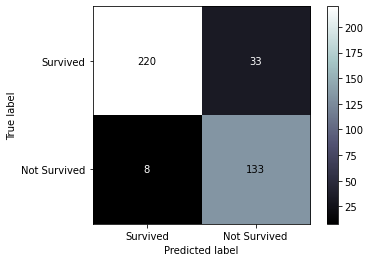

In [86]:
#Plotting the Confusion Matrix
dis = ConfusionMatrixDisplay(confusion_matrix=cmatrix1,
                        display_labels=["Survived", "Not Survived"])
dis.plot(cmap = plt.cm.bone)
plt.show()